**What**

Prove that we can take a 10-Q SEC URL and extract the text and preprocess the output (text cleaning) for NLP purposes. 
The code should execute quickly such that it is suitable to be implemented in a serverless cloud architecture.

**Outcome**

A reliable process that:
    
    - Can extract text from a URL for a 10-Q document
    - Is able to clean the text such that NLP techniques can be used

## Dependencies

In [7]:
!pip install html2text

In [8]:
import html2text
import urllib3
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Setup

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Methods

In [10]:
def get_text(URL):
    http = urllib3.PoolManager()
    response = http.request('GET', URL)
    return html2text.html2text(str(response.data)).replace("\\n", "").replace("\n", "").replace("|", "")

def generate_wordcloud(URL):
    http = urllib3.PoolManager()
    response = http.request('GET', URL)
    out = html2text.html2text(str(response.data)).replace("\\n", " ").replace("\n", "")
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(out)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## Spike

In [11]:
get_text("http://www.sec.gov/Archives/edgar/data/1000045/000119312513046001/d479837d10q.htm")

"b'10-Q1d479837d10q.htmFORM 10-Q ##### Table of Contents**UNITED STATES** **SECURITIES AND EXCHANGE COMMISSION****Washington, DC 20549****FORM 10-Q** ****x **** ****  **QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d)OF THE SECURITIES EXCHANGE ACT OF 1934**  ------  **FOR THE QUARTERLY PERIOD ENDED December  31, 2012 ** ****¨ **** ****  **TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d)OF THE SECURITIES EXCHANGE ACT OF 1934**  ------   **FOR THE TRANSITION PERIOD FROM                     TO.****Commission file number: 0-26680** **NICHOLAS FINANCIAL, INC.****(Exact Name of Registrant as Specified in its Charter)**   ---------   **British Columbia, Canada**     **8736-3354**  **(State or Other Jurisdiction of** **Incorporation or Organization)**  **(I.R.S. Employer****Identification No.)**       **2454 McMullen Booth Road, Building C**      **Clearwater, Florida**     **33759**   **(Address of Principal Executive Offices)**     **(Zip Code)**  **(727) 726-0763****(Registrant \x92s telep

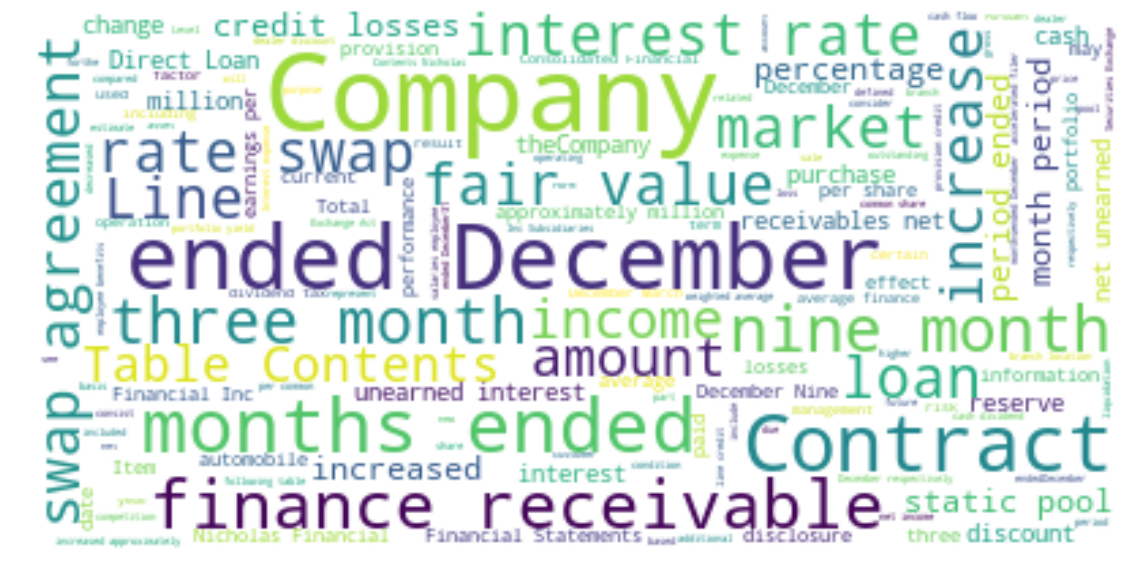

In [12]:
generate_wordcloud("http://www.sec.gov/Archives/edgar/data/1000045/000119312513046001/d479837d10q.htm")